# Analysis of ragas evaluation

Our criteria for a RAG evaluation framework are:
- Comprehensibility
- Reliability
- Costs
- Time

Following we are going to analyse the RAGAs framework (open-source) based on the last three criteria.

I am using the ragas_eval dataset as the golden dataset so I don't have to create one by my own and I can safe costs. 


In [3]:
from datasets import load_dataset

ragas_eval = load_dataset('explodinggradients/fiqa', 'ragas_eval', split='baseline')

In [4]:
from ragas.metrics import (
    answer_relevancy,
    answer_correctness,
    context_recall,
    context_relevancy
)

metrics = [answer_relevancy, answer_correctness, context_recall, context_relevancy]

- LLM-Judge temperatur = 0.0
- Time of evaluation (10 runs) = 30 min
- OpenAI Cost (10 runs) = 1.53$

In [10]:
from ragas import evaluate
from langchain_openai import ChatOpenAI
from langchain_openai import OpenAIEmbeddings
from dotenv import load_dotenv

load_dotenv()

results_list = []

for x in range(5):
    result = evaluate(dataset=ragas_eval, llm=ChatOpenAI(model_name='gpt-3.5-turbo', temperature=0.0), embeddings=OpenAIEmbeddings(model='text-embedding-3-small'), metrics=metrics, raise_exceptions=False)
    results_list.append(result)

passing column names as 'ground_truths' is deprecated and will be removed in the next version, please use 'ground_truth' instead. Note that `ground_truth` should be of type string and not Sequence[string] like `ground_truths`
Evaluating: 100%|██████████| 120/120 [02:56<00:00,  1.47s/it]
passing column names as 'ground_truths' is deprecated and will be removed in the next version, please use 'ground_truth' instead. Note that `ground_truth` should be of type string and not Sequence[string] like `ground_truths`
Evaluating:  68%|██████▊   | 82/120 [01:14<01:12,  1.90s/it]Task exception was never retrieved
future: <Task finished name='Task-2621' coro=<AsyncClient.aclose() done, defined at /home/dabr/code/langchain-rag-eval/venv/lib/python3.10/site-packages/httpx/_client.py:2011> exception=RuntimeError('Event loop is closed')>
Traceback (most recent call last):
  File "/home/dabr/code/langchain-rag-eval/venv/lib/python3.10/site-packages/httpx/_client.py", line 2018, in aclose
    await self.

In [8]:
first_list = results_list
print(first_list)

[{'answer_relevancy': 0.6444, 'answer_correctness': 0.4167, 'context_recall': 0.5882, 'context_relevancy': 0.2088}, {'answer_relevancy': 0.6147, 'answer_correctness': 0.4241, 'context_recall': 0.5834, 'context_relevancy': 0.2123}, {'answer_relevancy': 0.6120, 'answer_correctness': 0.4214, 'context_recall': 0.6342, 'context_relevancy': 0.2204}, {'answer_relevancy': 0.5452, 'answer_correctness': 0.3993, 'context_recall': 0.6210, 'context_relevancy': 0.1995}, {'answer_relevancy': 0.6447, 'answer_correctness': 0.4001, 'context_recall': 0.6270, 'context_relevancy': 0.2108}]


Here I am concatinating both lists so I have 10 evaluation result, because I accidently did only 5 runs of evaluation.

In [11]:
results_list = results_list + first_list
print(results_list)

[{'answer_relevancy': 0.6415, 'answer_correctness': 0.4291, 'context_recall': 0.6311, 'context_relevancy': 0.2322}, {'answer_relevancy': 0.6128, 'answer_correctness': 0.4234, 'context_recall': 0.6043, 'context_relevancy': 0.2417}, {'answer_relevancy': 0.7066, 'answer_correctness': 0.4145, 'context_recall': 0.6098, 'context_relevancy': 0.2227}, {'answer_relevancy': 0.6504, 'answer_correctness': 0.4212, 'context_recall': 0.6397, 'context_relevancy': 0.1982}, {'answer_relevancy': 0.5812, 'answer_correctness': 0.4090, 'context_recall': 0.5699, 'context_relevancy': 0.2142}, {'answer_relevancy': 0.6444, 'answer_correctness': 0.4167, 'context_recall': 0.5882, 'context_relevancy': 0.2088}, {'answer_relevancy': 0.6147, 'answer_correctness': 0.4241, 'context_recall': 0.5834, 'context_relevancy': 0.2123}, {'answer_relevancy': 0.6120, 'answer_correctness': 0.4214, 'context_recall': 0.6342, 'context_relevancy': 0.2204}, {'answer_relevancy': 0.5452, 'answer_correctness': 0.3993, 'context_recall': 0.

- LLM-Judge temperatur = 0.7
- Time of evaluation (10 runs) = 33 min
- OpenAI Cost (10 runs) = 1.28$

In [12]:
from ragas import evaluate
from langchain_openai import ChatOpenAI
from langchain_openai import OpenAIEmbeddings
from dotenv import load_dotenv

load_dotenv()

results_list_0_7 = []

for x in range(10):
    result = evaluate(dataset=ragas_eval, llm=ChatOpenAI(model_name='gpt-3.5-turbo', temperature=0.0), embeddings=OpenAIEmbeddings(model='text-embedding-3-small'), metrics=metrics, raise_exceptions=False)
    results_list_0_7.append(result)

passing column names as 'ground_truths' is deprecated and will be removed in the next version, please use 'ground_truth' instead. Note that `ground_truth` should be of type string and not Sequence[string] like `ground_truths`
Evaluating:   0%|          | 0/120 [00:00<?, ?it/s]Task exception was never retrieved
future: <Task finished name='Task-3732' coro=<AsyncClient.aclose() done, defined at /home/dabr/code/langchain-rag-eval/venv/lib/python3.10/site-packages/httpx/_client.py:2011> exception=RuntimeError('Event loop is closed')>
Traceback (most recent call last):
  File "/home/dabr/code/langchain-rag-eval/venv/lib/python3.10/site-packages/httpx/_client.py", line 2018, in aclose
    await self._transport.aclose()
  File "/home/dabr/code/langchain-rag-eval/venv/lib/python3.10/site-packages/httpx/_transports/default.py", line 385, in aclose
    await self._pool.aclose()
  File "/home/dabr/code/langchain-rag-eval/venv/lib/python3.10/site-packages/httpcore/_async/connection_pool.py", line 

In [13]:
print(results_list_0_7)

[{'answer_relevancy': 0.6111, 'answer_correctness': 0.4209, 'context_recall': 0.6192, 'context_relevancy': 0.2184}, {'answer_relevancy': 0.5144, 'answer_correctness': 0.4248, 'context_recall': 0.5869, 'context_relevancy': 0.2225}, {'answer_relevancy': 0.5783, 'answer_correctness': 0.4071, 'context_recall': 0.6084, 'context_relevancy': 0.2164}, {'answer_relevancy': 0.6181, 'answer_correctness': 0.4263, 'context_recall': 0.6317, 'context_relevancy': 0.2075}, {'answer_relevancy': 0.6446, 'answer_correctness': 0.4244, 'context_recall': 0.5934, 'context_relevancy': 0.2031}, {'answer_relevancy': 0.6431, 'answer_correctness': 0.4137, 'context_recall': 0.6390, 'context_relevancy': 0.2690}, {'answer_relevancy': 0.2374, 'answer_correctness': 0.6440, 'context_recall': 0.4106, 'context_relevancy': 0.5698}, {'answer_relevancy': 0.5797, 'answer_correctness': 0.4094, 'context_recall': 0.6342, 'context_relevancy': 0.2192}, {'answer_relevancy': 0.5748, 'answer_correctness': 0.3989, 'context_recall': 0.

Here I set the evalution outcome manually because I dont want to compute the evaluation again

In [2]:
results_list = [{'answer_relevancy': 0.6415, 'answer_correctness': 0.4291, 'context_recall': 0.6311, 'context_relevancy': 0.2322}, {'answer_relevancy': 0.6128, 'answer_correctness': 0.4234, 'context_recall': 0.6043, 'context_relevancy': 0.2417}, {'answer_relevancy': 0.7066, 'answer_correctness': 0.4145, 'context_recall': 0.6098, 'context_relevancy': 0.2227}, {'answer_relevancy': 0.6504, 'answer_correctness': 0.4212, 'context_recall': 0.6397, 'context_relevancy': 0.1982}, {'answer_relevancy': 0.5812, 'answer_correctness': 0.4090, 'context_recall': 0.5699, 'context_relevancy': 0.2142}, {'answer_relevancy': 0.6444, 'answer_correctness': 0.4167, 'context_recall': 0.5882, 'context_relevancy': 0.2088}, {'answer_relevancy': 0.6147, 'answer_correctness': 0.4241, 'context_recall': 0.5834, 'context_relevancy': 0.2123}, {'answer_relevancy': 0.6120, 'answer_correctness': 0.4214, 'context_recall': 0.6342, 'context_relevancy': 0.2204}, {'answer_relevancy': 0.5452, 'answer_correctness': 0.3993, 'context_recall': 0.6210, 'context_relevancy': 0.1995}, {'answer_relevancy': 0.6447, 'answer_correctness': 0.4001, 'context_recall': 0.6270, 'context_relevancy': 0.2108}]
results_list_0_7 = [{'answer_relevancy': 0.6111, 'answer_correctness': 0.4209, 'context_recall': 0.6192, 'context_relevancy': 0.2184}, {'answer_relevancy': 0.5144, 'answer_correctness': 0.4248, 'context_recall': 0.5869, 'context_relevancy': 0.2225}, {'answer_relevancy': 0.5783, 'answer_correctness': 0.4071, 'context_recall': 0.6084, 'context_relevancy': 0.2164}, {'answer_relevancy': 0.6181, 'answer_correctness': 0.4263, 'context_recall': 0.6317, 'context_relevancy': 0.2075}, {'answer_relevancy': 0.6446, 'answer_correctness': 0.4244, 'context_recall': 0.5934, 'context_relevancy': 0.2031}, {'answer_relevancy': 0.6431, 'answer_correctness': 0.4137, 'context_recall': 0.6390, 'context_relevancy': 0.2690}, {'answer_relevancy': 0.2374, 'answer_correctness': 0.6440, 'context_recall': 0.4106, 'context_relevancy': 0.5698}, {'answer_relevancy': 0.5797, 'answer_correctness': 0.4094, 'context_recall': 0.6342, 'context_relevancy': 0.2192}, {'answer_relevancy': 0.5748, 'answer_correctness': 0.3989, 'context_recall': 0.6260, 'context_relevancy': 0.2270}, {'answer_relevancy': 0.5772, 'answer_correctness': 0.3924, 'context_recall': 0.5978, 'context_relevancy': 0.2232}]


In [5]:
answer_relevancy = [d['answer_relevancy'] for d in results_list]
answer_correctness = [d['answer_correctness'] for d in results_list]
context_recall = [d['context_recall'] for d in results_list]
context_relevancy = [d['context_relevancy'] for d in results_list]

answer_relevancy_0_7 = [d['answer_relevancy'] for d in results_list_0_7]
answer_correctness_0_7 = [d['answer_correctness'] for d in results_list_0_7]
context_recall_0_7 = [d['context_recall'] for d in results_list_0_7]
context_relevancy_0_7 = [d['context_relevancy'] for d in results_list_0_7]

print("Answer relevancies with temp=0:", answer_relevancy)
print("Answer relevancies with temp=0.7:", answer_relevancy_0_7)
print("Answer correctness with temp=0:", answer_correctness)
print("Answer correctness with temp=0.7:", answer_correctness_0_7)
print("Context recall with temp=0:", context_recall)
print("Context recall with temp=0.7:", context_recall_0_7)
print("Context relevancy with temp=0:", context_relevancy)
print("Context relevancy with temp=0.7:", context_relevancy_0_7)

Answer relevancies with temp=0: [0.6415, 0.6128, 0.7066, 0.6504, 0.5812, 0.6444, 0.6147, 0.612, 0.5452, 0.6447]
Answer relevancies with temp=0.7: [0.6111, 0.5144, 0.5783, 0.6181, 0.6446, 0.6431, 0.2374, 0.5797, 0.5748, 0.5772]
Answer correctness with temp=0: [0.4291, 0.4234, 0.4145, 0.4212, 0.409, 0.4167, 0.4241, 0.4214, 0.3993, 0.4001]
Answer correctness with temp=0.7: [0.4209, 0.4248, 0.4071, 0.4263, 0.4244, 0.4137, 0.644, 0.4094, 0.3989, 0.3924]
Context recall with temp=0: [0.6311, 0.6043, 0.6098, 0.6397, 0.5699, 0.5882, 0.5834, 0.6342, 0.621, 0.627]
Context recall with temp=0.7: [0.6192, 0.5869, 0.6084, 0.6317, 0.5934, 0.639, 0.4106, 0.6342, 0.626, 0.5978]
Context relevancy with temp=0: [0.2322, 0.2417, 0.2227, 0.1982, 0.2142, 0.2088, 0.2123, 0.2204, 0.1995, 0.2108]
Context relevancy with temp=0.7: [0.2184, 0.2225, 0.2164, 0.2075, 0.2031, 0.269, 0.5698, 0.2192, 0.227, 0.2232]


As we can see we have a lot of variation in outcomes of those metrics. Now we will calculate the standard deviation for the metrics to get a number for the variance of the outcome.

In [6]:
import numpy as np

std_answer_relevance = round(np.std(answer_relevancy), 4)
std_answer_relevance_0_7 = round(np.std(answer_relevancy_0_7), 4)
std_answer_correctness = round(np.std(answer_correctness), 4)
std_answer_correctness_0_7 = round(np.std(answer_correctness_0_7), 4)
std_context_recall = round(np.std(context_recall), 4)
std_context_recall_0_7 = round(np.std(context_recall_0_7), 4)
std_context_relevancy = round(np.std(context_relevancy), 4)
std_context_relevancy_0_7= round(np.std(context_relevancy_0_7), 4)


Here we plotting the outcomes

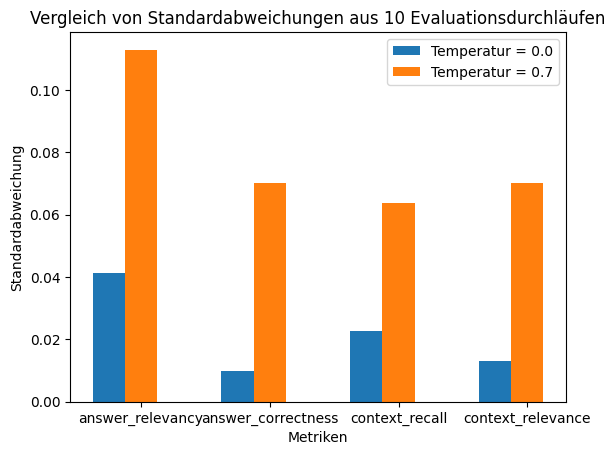

In [9]:
import matplotlib.pyplot as plt

x = ['answer_relevancy', 'answer_correctness', 'context_recall', 'context_relevance']

y_0 = [std_answer_relevance, std_answer_correctness, std_context_recall, std_context_relevancy] 
y_1 = [std_answer_relevance_0_7, std_answer_correctness_0_7, std_context_recall_0_7, std_answer_correctness_0_7]
# y_2 = [0.0827, 0.0983, 0.0396, 0.1001]

x_axis = np.arange(len(x))

bar_width = 0.25
plt.bar(x_axis - bar_width, y_0, width=bar_width, label='Temperatur = 0.0')
plt.bar(x_axis, y_1, width=bar_width, label='Temperatur = 0.7')

plt.xticks(x_axis, x)
plt.xlabel('Metriken')
plt.ylabel('Standardabweichung')
plt.title('Vergleich von Standardabweichungen aus 10 Evaluationsdurchläufen')
plt.legend()
plt.show()